# Odd Ball

# Modelling Time!

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [203]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [204]:
modelling_df = pd.read_csv('csv/no_club.csv', index_col=0)

In [205]:
modelling_df.head()

,FTR,season_period,xg1_5g_avg,xg2_5g_avg,gd_5g_avg,elo_diff,game1_D,game1_H,game2_D,game2_H,game3_D,game3_H,game4_D,game4_H,game5_D,game5_H
0,0,0,0.650,1.306,0.4,-90.930786,0,0,0,1,1,0,0,1,0,0
340,1,0,1.078,1.228,1.0,30.798828,0,0,0,1,0,1,0,1,1,0
1,0,0,0.596,1.138,0.8,12.096313,0,1,1,0,0,1,0,0,0,1
392,0,0,2.090,0.756,2.0,110.588257,0,1,0,1,0,0,0,1,0,1
170,2,0,2.468,0.630,1.4,280.346558,0,1,0,1,0,1,1,0,1,0


In [206]:
y = modelling_df.pop('FTR')

In [207]:
# Getting that sweet baseline

In [208]:
y.value_counts(normalize=True)

0    0.483168
1    0.300000
2    0.216832
Name: FTR, dtype: float64

In [209]:
X = modelling_df.copy()

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [211]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=(X_train.columns))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [212]:
X_train.columns

Index(['season_period', 'xg1_5g_avg', 'xg2_5g_avg', 'gd_5g_avg', 'elo_diff',
       'game1_D', 'game1_H', 'game2_D', 'game2_H', 'game3_D', 'game3_H',
       'game4_D', 'game4_H', 'game5_D', 'game5_H'],
      dtype='object')

In [86]:
model = LogisticRegressionCV(solver='newton-cg', multi_class='multinomial', cv=5)

model.fit(X_train, y_train)
yhat_test = model.predict(X_test)
log_reg_test = model.score(X_test, y_test)
log_reg_cv = model.score(X_train, y_train)
print(log_reg_test)
print(log_reg_cv)

0.5652173913043478
0.5785997357992074


In [87]:
pd.DataFrame(confusion_matrix(y_test, yhat_test))

,0,1,2
0,105,17,0
1,38,38,0
2,42,13,0


#### Won't use the above model as it doesn't predict draws, just hates them. Also, doesn't like predicting anything other than home wins... May be something to pursue in the future though

In [88]:
model = LogisticRegressionCV(solver='liblinear', multi_class='ovr', cv=5)

model.fit(X_train, y_train)
yhat_test = model.predict(X_test)
log_reg_test = model.score(X_test, y_test)
log_reg_cv = model.score(X_train, y_train)
print(log_reg_test)
print(log_reg_cv)

0.5217391304347826
0.5270805812417437


In [89]:
pd.DataFrame(confusion_matrix(y_test, yhat_test))

,0,1,2
0,80,9,33
1,14,28,34
2,23,8,24


In [90]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       122
           1       0.62      0.37      0.46        76
           2       0.26      0.44      0.33        55

   micro avg       0.52      0.52      0.52       253
   macro avg       0.52      0.49      0.49       253
weighted avg       0.57      0.52      0.53       253



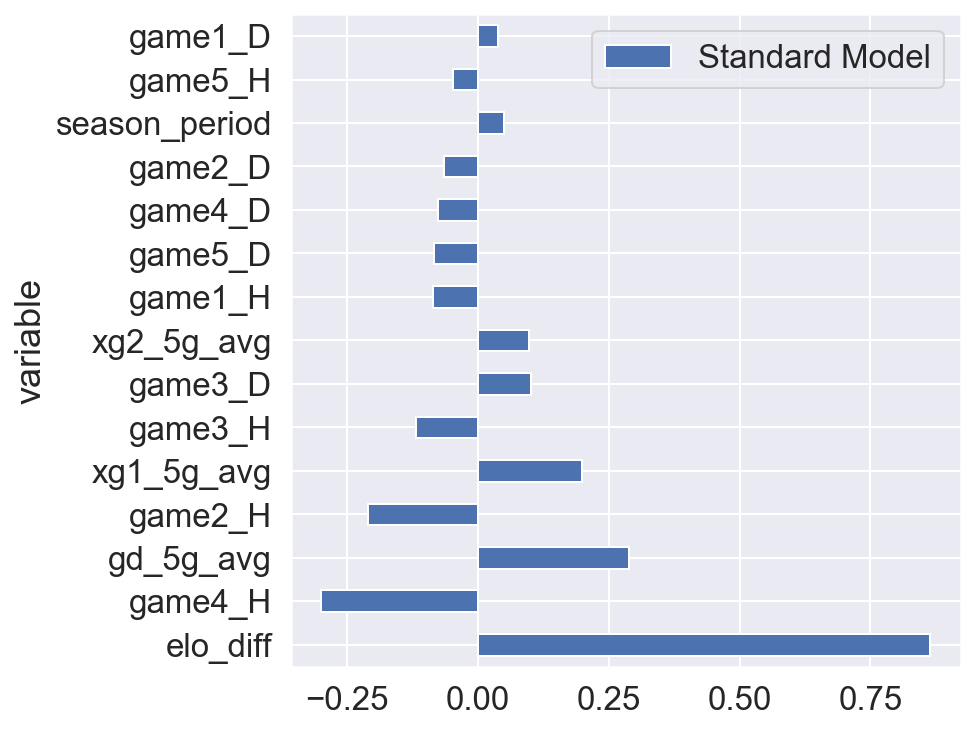

In [91]:
coefs_vars_model = pd.DataFrame({
    'coef': model.coef_[0],
    'variable': X.columns,
    'abscoef': np.abs(model.coef_[0])
})
coefs_vars_model.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars_model.plot(kind='barh', x='variable', y='coef',
                      color='b', figsize=(6, 6), label='Standard Model')
plt.show()

In [112]:
lr_ridge = LogisticRegressionCV(
    penalty='l2', Cs=100, cv=5, solver='liblinear', multi_class='auto')
lr_ridge.fit(X_train, y_train)


ridge_test = lr_ridge.score(X_test, y_test)
ridge_cv = lr_ridge.score(X_train, y_train)

print(lr_ridge.C_)
print(ridge_test)
print(ridge_cv)


[4.03701726e+00 5.59081018e-02 1.00000000e-04]
0.5217391304347826
0.5284015852047557


In [226]:
yhat_ridge = lr_ridge.predict(X_test)
yhat_pp_ridge = lr_ridge.predict_proba(X_test)
pd.DataFrame(confusion_matrix(y_test, yhat_ridge))

,0,1,2
0,65,11,46
1,18,30,28
2,19,6,30


In [115]:
print(classification_report(y_test, yhat_ridge))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       122
           1       0.62      0.37      0.46        76
           2       0.26      0.44      0.33        55

   micro avg       0.52      0.52      0.52       253
   macro avg       0.52      0.49      0.49       253
weighted avg       0.57      0.52      0.53       253



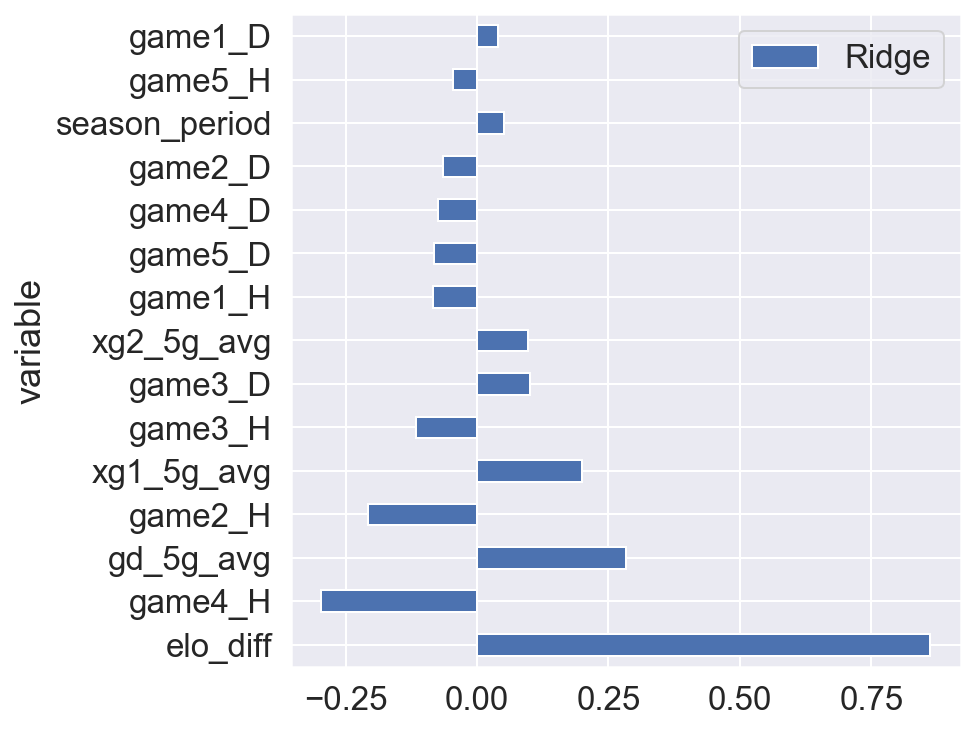

In [116]:
coefs_vars_ridge = pd.DataFrame({
    'coef': lr_ridge.coef_[0],
    'variable': X.columns,
    'abscoef': np.abs(lr_ridge.coef_[0])
})
coefs_vars_ridge.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars_ridge.plot(kind='barh', x='variable', y='coef',
                      color='b', figsize=(6, 6), label='Ridge')
plt.show()

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

folds = 5
max_neighbors = 65



# plot test accuracy by number of neighbors:
test_acc = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, X_train, y_train, cv=folds)))

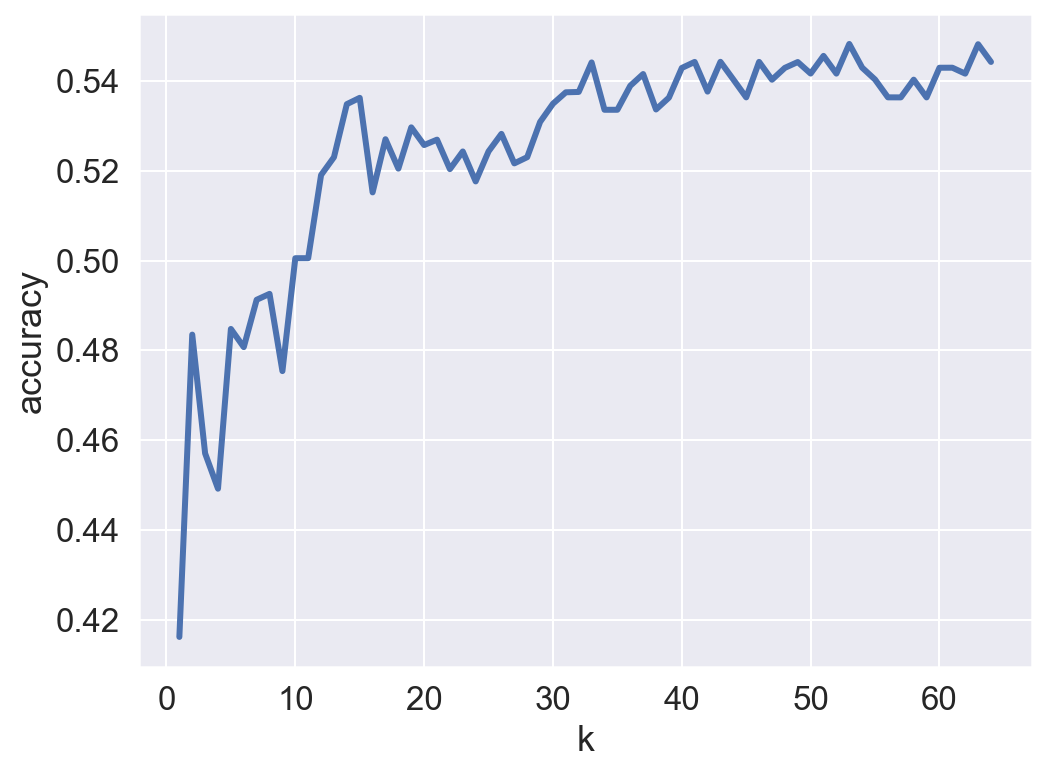

In [118]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, int(max_neighbors)), test_acc, lw=3.)
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
plt.show()

In [119]:
knn = KNeighborsClassifier(n_neighbors=63)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))
print(max(test_acc))


0.5335968379446641
0.5482934159837979


In [120]:
knn_test = knn.score(X_test, y_test)
knn_cv = cross_val_score(knn, X_train, y_train, cv=5).mean()

In [228]:
yhat_knn = knn.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, yhat_knn))

,0,1,2
0,109,13,0
1,45,31,0
2,41,13,1


In [213]:
from sklearn import svm, linear_model, datasets

In [214]:
clf = svm.SVC(gamma='scale', probability=True)
clf_cv = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
clf_test = clf.fit(X_train, y_train).score(X_test, y_test)

In [215]:
clf_test

0.541501976284585

In [227]:
yhat_clf = clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, yhat_clf))

,0,1,2
0,99,22,1
1,36,38,2
2,40,15,0


In [216]:
clf.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

In [125]:
from sklearn.model_selection import GridSearchCV


gamma_range = np.logspace(-5, 2, 20)
c = np.linspace(1,100,10)
param_grid = dict(gamma=gamma_range, C=c, kernel=['rbf'])

clf_grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy',
                    verbose=True, return_train_score=True, iid=False, n_jobs=2)
clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  66 tasks      | elapsed:    5.8s
[Parallel(n_jobs=2)]: Done 366 tasks      | elapsed:   24.0s
[Parallel(n_jobs=2)]: Done 866 tasks      | elapsed:  1.0min
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=2,
       param_grid={'gamma': array([1.00000e-05, 2.33572e-05, 5.45559e-05, 1.27427e-04, 2.97635e-04,
       6.95193e-04, 1.62378e-03, 3.79269e-03, 8.85867e-03, 2.06914e-02,
       4.83293e-02, 1.12884e-01, 2.63665e-01, 6.15848e-01, 1.43845e+00,
       3.35982e+00, 7.84760e+00, 1.83298e+01, 4.28133e+01, 1.00000e+02]), 'C': array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.]), 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

In [126]:
clf_grid_results = pd.DataFrame(clf_grid.cv_results_)
clf_grid_results['gamma'] = [x['gamma'] for x in clf_grid_results.params.values]
clf_grid_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,gamma
0,0.058257,0.001196,0.002785,0.000150,1,1e-05,rbf,"{'C': 1.0, 'gamma': 1e-05, 'kernel': 'rbf'}",0.48366,0.480263,...,0.002027,84,0.483444,0.484298,0.483498,0.483498,0.482702,0.483488,0.000505,0.000010
1,0.072943,0.017148,0.004183,0.001613,1,2.33572e-05,rbf,"{'C': 1.0, 'gamma': 2.3357214690901213e-05, 'k...",0.48366,0.480263,...,0.002027,84,0.483444,0.484298,0.483498,0.483498,0.482702,0.483488,0.000505,0.000023
2,0.072717,0.013617,0.002750,0.000207,1,5.45559e-05,rbf,"{'C': 1.0, 'gamma': 5.4555947811685143e-05, 'k...",0.48366,0.480263,...,0.002027,84,0.483444,0.484298,0.483498,0.483498,0.482702,0.483488,0.000505,0.000055
3,0.060314,0.000773,0.002580,0.000092,1,0.000127427,rbf,"{'C': 1.0, 'gamma': 0.00012742749857031334, 'k...",0.48366,0.480263,...,0.002027,84,0.483444,0.484298,0.483498,0.483498,0.482702,0.483488,0.000505,0.000127
4,0.060961,0.001538,0.003041,0.000873,1,0.000297635,rbf,"{'C': 1.0, 'gamma': 0.00029763514416313193, 'k...",0.48366,0.480263,...,0.002027,84,0.483444,0.484298,0.483498,0.483498,0.482702,0.483488,0.000505,0.000298


In [127]:
clf_grid.best_params_

{'C': 34.0, 'gamma': 0.00029763514416313193, 'kernel': 'rbf'}

In [128]:

clf_grid_cv = clf_grid.score(X_train, y_train)
clf_grid_test = clf_grid.score(X_test, y_test)

In [129]:
clf_grid_test

0.5533596837944664

In [229]:
yhat_clf_grid = clf_grid.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, yhat_clf_grid))

,0,1,2
0,99,23,0
1,41,35,0
2,43,12,0


In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [140]:

DT = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=DT,
                       n_estimators=50,
                       max_features=0.5,
                       max_samples=0.5,
                       oob_score=True)


bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=50, n_jobs=None, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [141]:
bc_cv = cross_val_score(bc, X_train, y_train, cv=5).mean()

In [142]:
bc_test = bc.score(X_test, y_test)

In [230]:
yhat_bc = bc.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, yhat_bc))

,0,1,2
0,118,4,0
1,17,55,4
2,17,5,33


In [143]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [144]:
gradboo_model = GradientBoostingClassifier(n_estimators=1000,
                                   criterion='mse',
                                   loss='deviance',
                                   max_depth=3,
                                   #learning_rate=1.0,
                                   random_state=1,
                                   min_samples_split=4)
gradboo_model.fit(X_train, y_train)


gradboo_cv = cross_val_score(gradboo_model, X_train, y_train, cv=5).mean()
gradboo_test = gradboo_model.score(X_test, y_test)

0    0.525692
1    0.573123
2    0.573123
3    0.577075
4    0.573123
dtype: float64


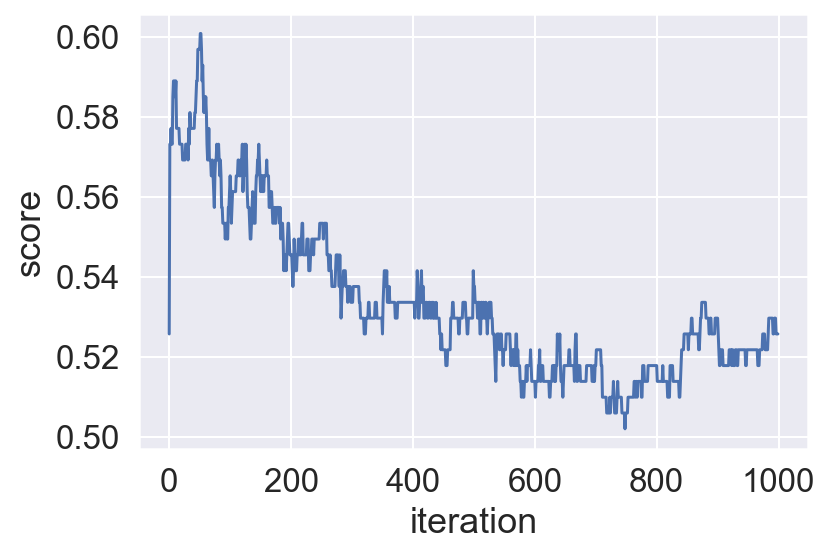

In [145]:
scores = pd.DataFrame(gradboo_model.staged_predict(X_test)).T.apply(
    lambda x: accuracy_score(y_test, x), axis=0)
print(scores.head())
scores.plot()
plt.xlabel('iteration')
plt.ylabel('score')
plt.show()

In [231]:
yhat_gradboo = gradboo_model.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, yhat_gradboo))

,0,1,2
0,100,11,11
1,16,53,7
2,15,5,35


In [146]:
gradboo_model.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.1,
              loss='deviance', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=4, min_weight_fraction_leaf=0.0,
              n_estimators=1000, n_iter_no_change=None, presort='auto',
              random_state=1, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)>

In [147]:
params = {'n_estimators':[100,10000,100],
          'max_depth':[3,4,5],
          'min_samples_split':[2,4,6]
          }

grad_grid = GridSearchCV(gradboo_model, params, cv=5, n_jobs=2, verbose=1)

In [148]:
grad_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 135 out of 135 | elapsed:  5.4min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.1,
              loss='deviance', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=...te=1, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'n_estimators': [100, 10000, 100], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [149]:
grad_grid.best_params_

{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}

In [190]:
grad_grid_cv = grad_grid.score(X_test, y_test)

In [191]:
grad_grid_test = grad_grid.score(X_test, y_test)

In [237]:
yhat_gradgrid = grad_grid.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, yhat_gradgrid))

,0,1,2
0,104,11,7
1,29,43,4
2,24,6,25


### Quick check to see what the accuracy is like across all my X!

In [152]:
lr_preds = pd.DataFrame(model.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [153]:
knn_preds = pd.DataFrame(knn.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [154]:
ridge_preds = pd.DataFrame(lr_ridge.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [220]:
svc_preds = pd.DataFrame(clf.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [157]:
svc_grid_preds = pd.DataFrame(clf_grid.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [159]:
bc_preds = pd.DataFrame(bc.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [160]:
gradboo_preds = pd.DataFrame(gradboo_model.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [161]:
gradgrid_preds = pd.DataFrame(grad_grid.predict_proba(X), columns=['HomeWin', 'AwayWin', 'Draw'])

In [199]:
# looping tester

model_preddies = [lr_preds, ridge_preds, knn_preds, svc_preds, bc_preds, gradboo_preds, svc_grid_preds,
                 gradgrid_preds]

results = []

for mod in model_preddies:
    
    orig_df = pd.read_csv('csv/new_df.csv')
    orig_df = pd.concat([orig_df, mod], axis=1)

    checkywecky = []
    for i in range(len(orig_df)):
        checkywecky.append(np.argmax(orig_df[['HomeWin', 'Draw', 'AwayWin']].iloc[i]))

    results.append(sum([1 if j==n else 0 for j,n in 
         zip([0 if i=='HomeWin' else 1 if i=='AwayWin' else 2 for i in checkywecky], 
             orig_df['FTR'])])/1010)
    

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [192]:
models_df = pd.DataFrame([results,
               [log_reg_test, ridge_test, knn_test, clf_test, bc_test, gradboo_test, clf_grid_test, 
                grad_grid_test],
               [log_reg_cv, ridge_cv, knn_cv, clf_cv, bc_cv, gradboo_cv, clf_grid_cv,
               grad_grid_cv]], 
                         columns=['LogReg', 'Ridge', 'KNN','SVC', 'SVC_Grad',
                             'BaggClass', 'GradBoost', 'GradGrid'],
            index=['money_maker', 'test', 'cv']).T.sort_values(by='money_maker', ascending=False)

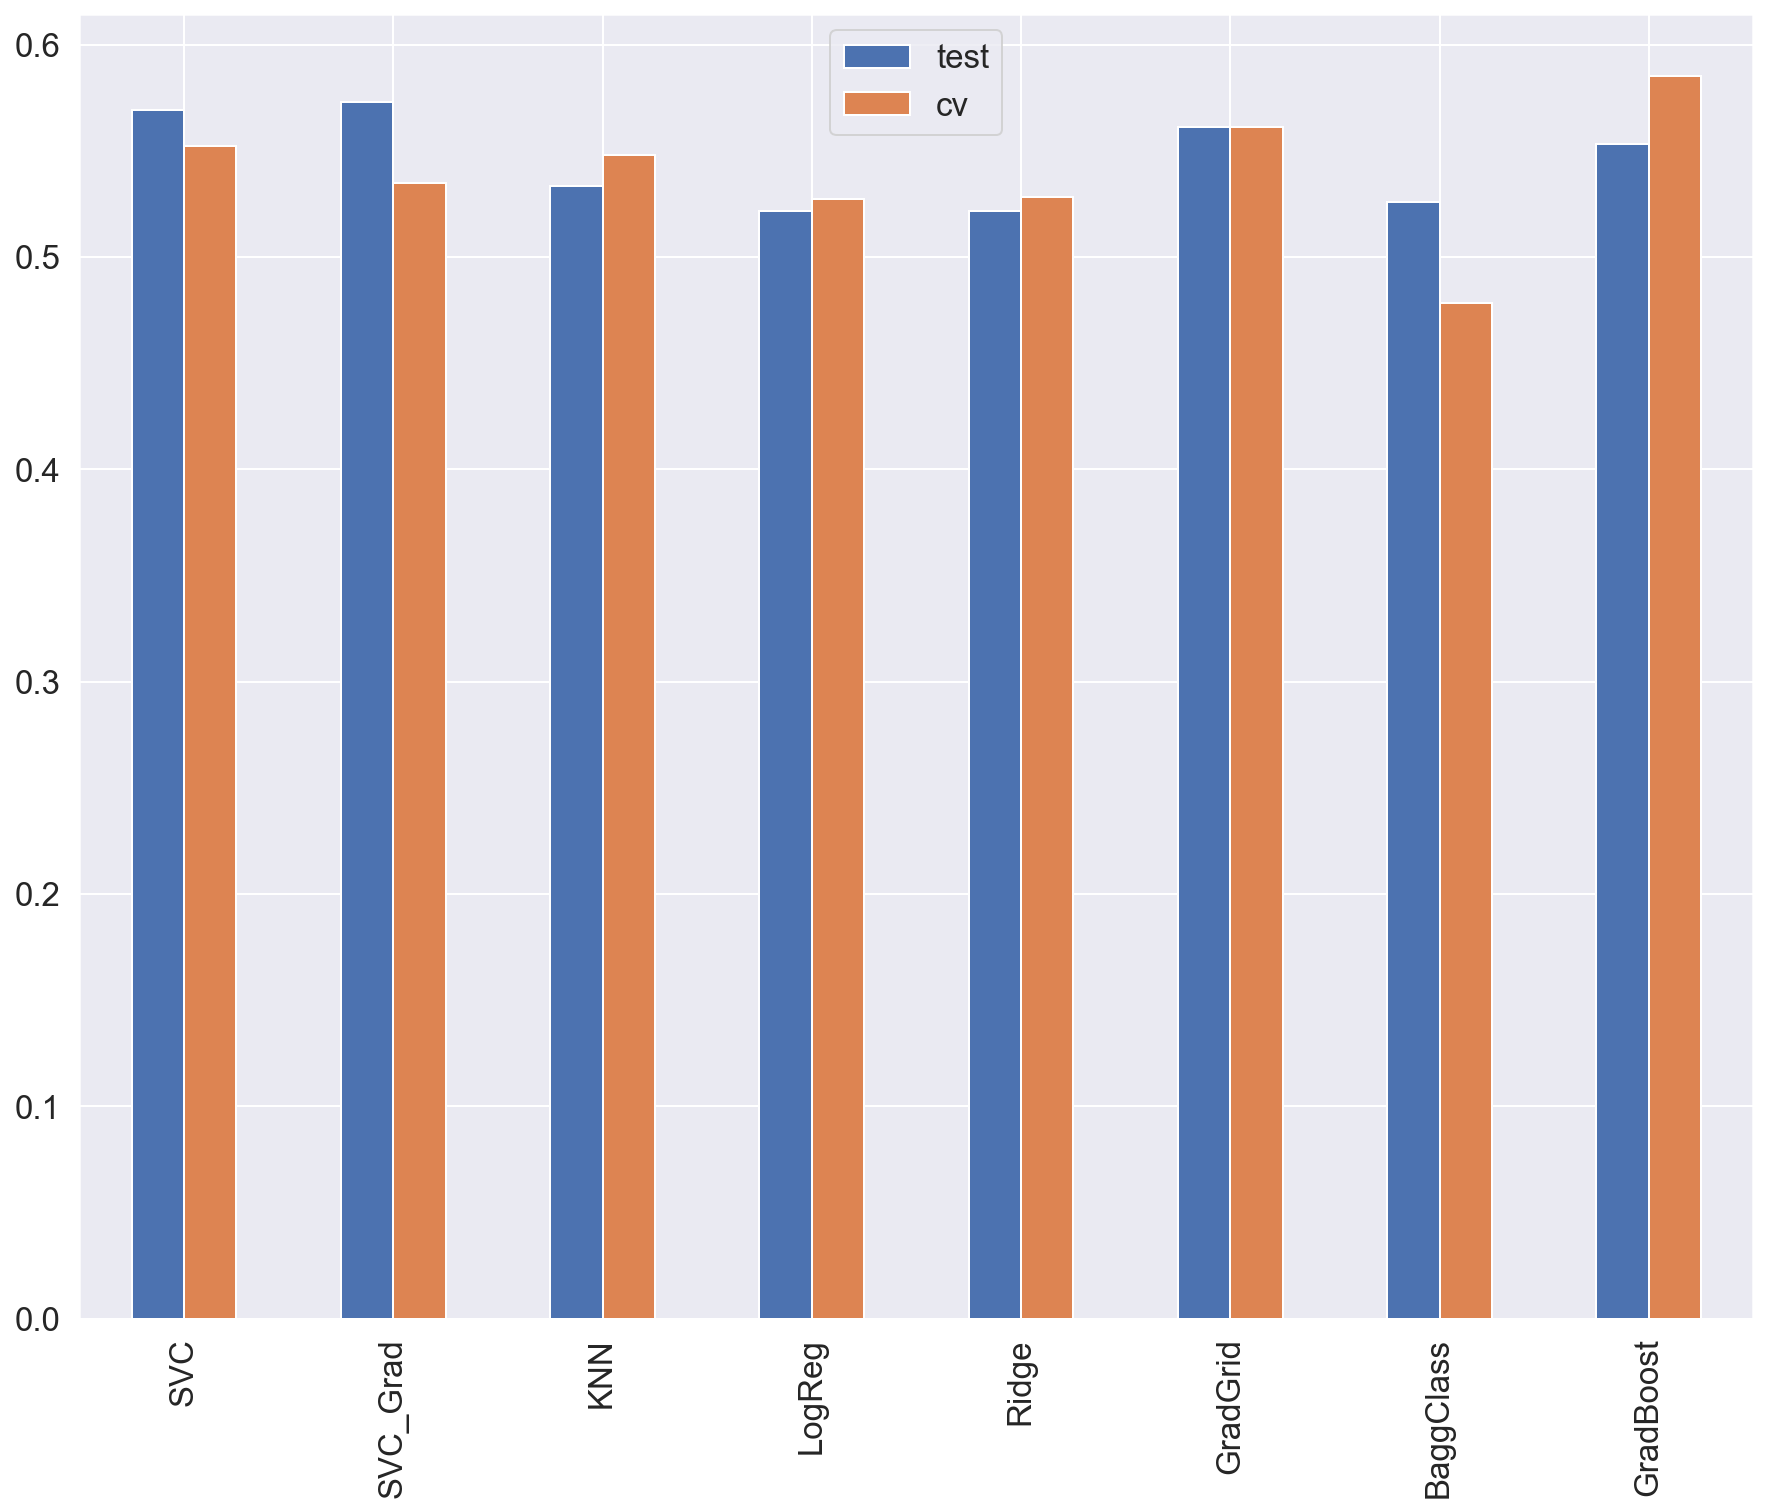

In [193]:
from matplotlib import pyplot as plt
models_df.drop(columns=['money_maker']).plot(kind='bar', figsize=[15,12])
plt.savefig('model.png', bbox_inches='tight')

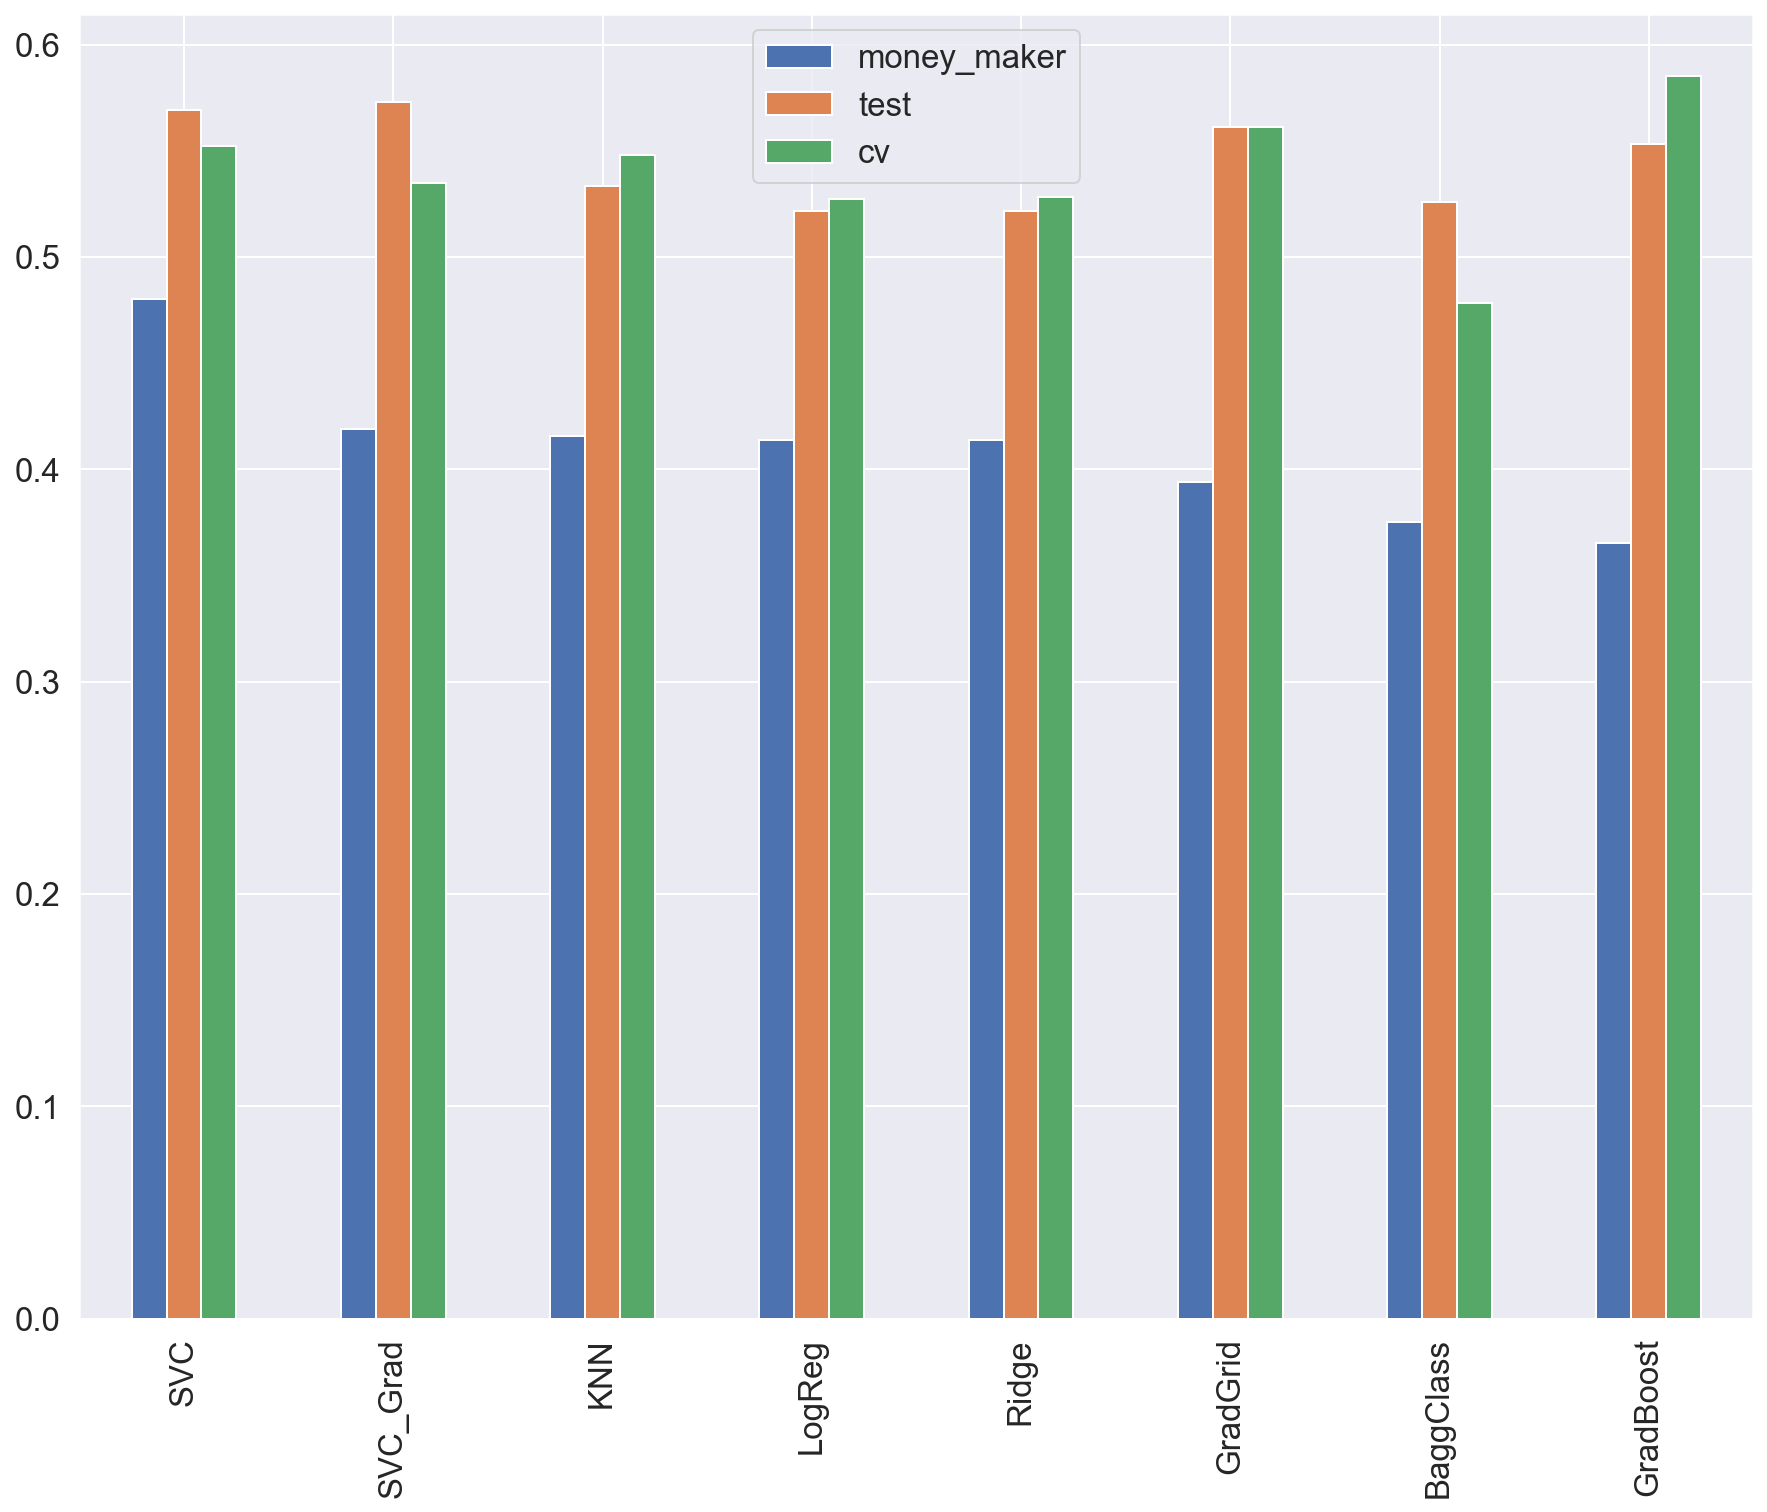

In [194]:
from matplotlib import pyplot as plt
models_df.plot(kind='bar', figsize=[15,12])
plt.savefig('moneymaker.png', bbox_inches='tight')

In [195]:
models_df.sort_values(by='money_maker', ascending=False)

,money_maker,test,cv
SVC,0.480198,0.569170,0.552181
SVC_Grad,0.418812,0.573123,0.534926
KNN,0.415842,0.533597,0.548232
LogReg,0.413861,0.521739,0.527081
Ridge,0.413861,0.521739,0.528402
GradGrid,0.394059,0.561265,0.561265
BaggClass,0.375248,0.525692,0.478310
GradBoost,0.365347,0.553360,0.585205


In [196]:
clf_test

0.5691699604743083

In [233]:
orig_df = pd.read_csv('csv/new_df.csv')
orig_df = pd.concat([orig_df, svc_preds], axis=1)
orig_df['HomeWin'] = [round(i, 3) for i in orig_df['HomeWin']]
orig_df['AwayWin'] = [round(i, 3) for i in orig_df['AwayWin']]
orig_df['Draw'] = [round(i, 3) for i in orig_df['Draw']]
orig_df.to_csv('csv/with_probs_svcstd.csv')

In [236]:
orig_df = pd.read_csv('csv/new_df.csv')
orig_df = pd.concat([orig_df, bc_preds], axis=1)
orig_df['HomeWin'] = [round(i, 3) for i in orig_df['HomeWin']]
orig_df['AwayWin'] = [round(i, 3) for i in orig_df['AwayWin']]
orig_df['Draw'] = [round(i, 3) for i in orig_df['Draw']]
orig_df.to_csv('csv/with_probs_bagcla.csv')

In [238]:
orig_df = pd.read_csv('csv/new_df.csv')
orig_df = pd.concat([orig_df, gradboo_preds], axis=1)
orig_df['HomeWin'] = [round(i, 3) for i in orig_df['HomeWin']]
orig_df['AwayWin'] = [round(i, 3) for i in orig_df['AwayWin']]
orig_df['Draw'] = [round(i, 3) for i in orig_df['Draw']]
orig_df.to_csv('csv/with_probs_gradboo.csv')